# Survivor Bias
Below is a demonstration of survivor bias. Specifically, the example shows how restricting until survival until t=50 can result in the wrong inference. The treatment/exposure ($A=1$) is beneficial for the whole time period compared to no treatment ($A=0$). However, when restricting to only those who survive until t=50 results in a reversal of the true relationship. This example highlights why we should focus on incident exposures/treatments for causal inference

In [4]:
%matplotlib inline
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


def data_generator(n):
    t1 = np.round(np.random.weibull(a=1.2, size=n) * 25 + 18, 2)
    t2 = np.round(np.random.weibull(a=0.6, size=n) * 10 + 18, 2)
    return t1, t2


np.random.seed(1011)
t1, t2 = data_generator(25000)

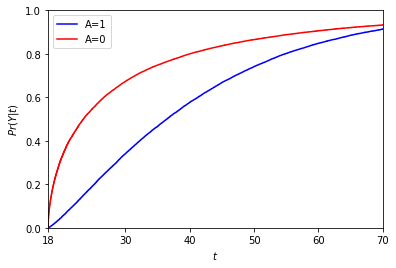

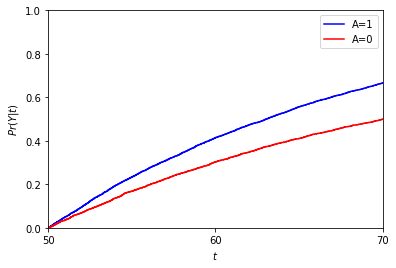

In [5]:
# Full survival distribution
km1 = KaplanMeierFitter()
km1.fit(t1)
km2 = KaplanMeierFitter()
km2.fit(t2)

plt.step(km1.timeline, 1 - km1.survival_function_, where='post', color='b', label='A=1')
plt.step(km2.timeline, 1 - km2.survival_function_, where='post', color='r', label='A=0')
plt.xlim([18, 70])
plt.xticks([18, 30, 40, 50, 60, 70])
plt.ylim([0, 1])
plt.ylabel('$Pr(Y|t)$')
plt.xlabel('$t$')
plt.legend()
plt.show()

# Restricting only to those who survive until time = 50
t1r = t1[np.where(t1 > 50)]
t2r = t2[np.where(t2 > 50)]
km1 = KaplanMeierFitter()
km1.fit(t1r)
km2 = KaplanMeierFitter()
km2.fit(t2r)

plt.step(km1.timeline, 1 - km1.survival_function_, where='post', color='b', label='A=1')
plt.step(km2.timeline, 1 - km2.survival_function_, where='post', color='r', label='A=0')
plt.xlim([50, 70])
plt.xticks([50, 60, 70])
plt.ylim([0, 1])
plt.ylabel('$Pr(Y|t)$')
plt.xlabel('$t$')
plt.legend()
plt.show()